<a href="https://colab.research.google.com/github/Prprprpprprprprppr/Dopeity-Projecty/blob/main/SignLanguageDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import zipfile
import os

zip_path = "/content/sign_mnist_train.csv (1).zip"
extract_path = "/content/sign_mnist_train_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [9]:
import zipfile
import os

zip_path = "/sign_mnist_test.zip"
extract_path = "/content/sign_mnist_test_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [10]:
for dirname, _, filenames in os.walk(extract_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/sign_mnist_test_data/sign_mnist_test.csv


In [12]:
# Libraries
import numpy as np
import pandas as pd
import random as rd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from PIL import Image

# CNN Tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.layers.experimental import preprocessing # Removed deprecated import
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # ✅ Correct


# Reproducibility
from numpy.random import seed
seed(10)
tf.random.set_seed(20)

In [14]:
train = pd.read_csv("/content/sign_mnist_train_data/sign_mnist_train.csv")
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [16]:
test = pd.read_csv("/sign_mnist_test.zip")
test.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [17]:
#summing the number of na in the training set for each column
print(sum(train.isna().sum()))

#summing the number of na in the test set for each column
print(sum(test.isna().sum()))

0
0


In [18]:
#summing the number of null values in the training set for each column
print(sum(train.isnull().sum()))

#summing the number of null values in the test set for each column
print(sum(test.isnull().sum()))

0
0


In [19]:
#creating our Y for the training data
Y_train = train["label"]

#creating our X for the training data
X_train = train.drop(labels = ["label"],axis = 1)

In [20]:
#creating our Y for the test data
Y_test = test["label"]

#creating our X for the training data
X_test = test.drop(labels = ["label"],axis = 1)

In [21]:
#converting the range of the pixel data from 0-255 to 0-1
X_train = X_train / 255.0

X_test = X_test / 255.0

In [22]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print(X_train.shape)
print(X_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [23]:
#creating an interactive bar graph that shows the distrubition of labels within the training set
fig = px.histogram(train,
                   x='label',
                   color = 'label',
                   title="Distrubition of Labels in the Training Set",
                   width=700, height=500)
fig.show()

In [24]:
#creating an interactive bar graph that shows the distrubition of labels within the test set
fig = px.histogram(test,
                   x='label',
                   color = 'label',
                   title="Distrubition of Labels in the Test Set",
                   width=700, height=500)
fig.show()

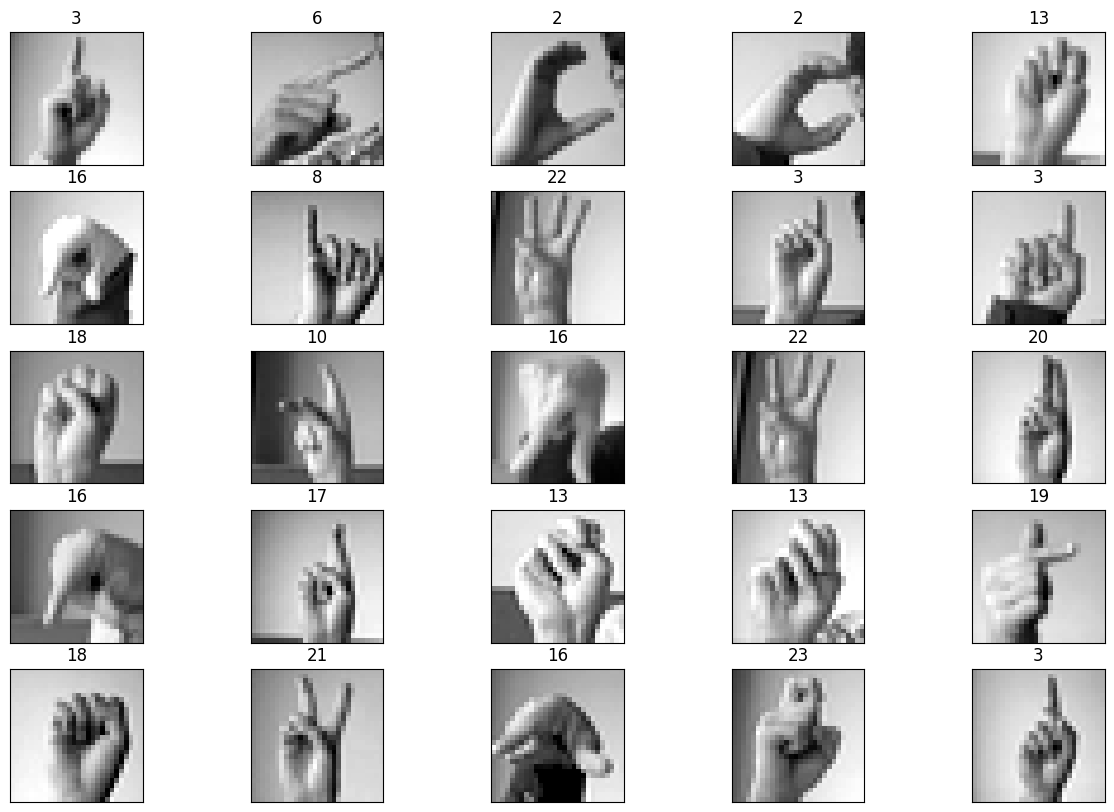

In [25]:
#creating a 5x5 grid of the first 25 photos in the training images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(Y_train[i])
plt.show()

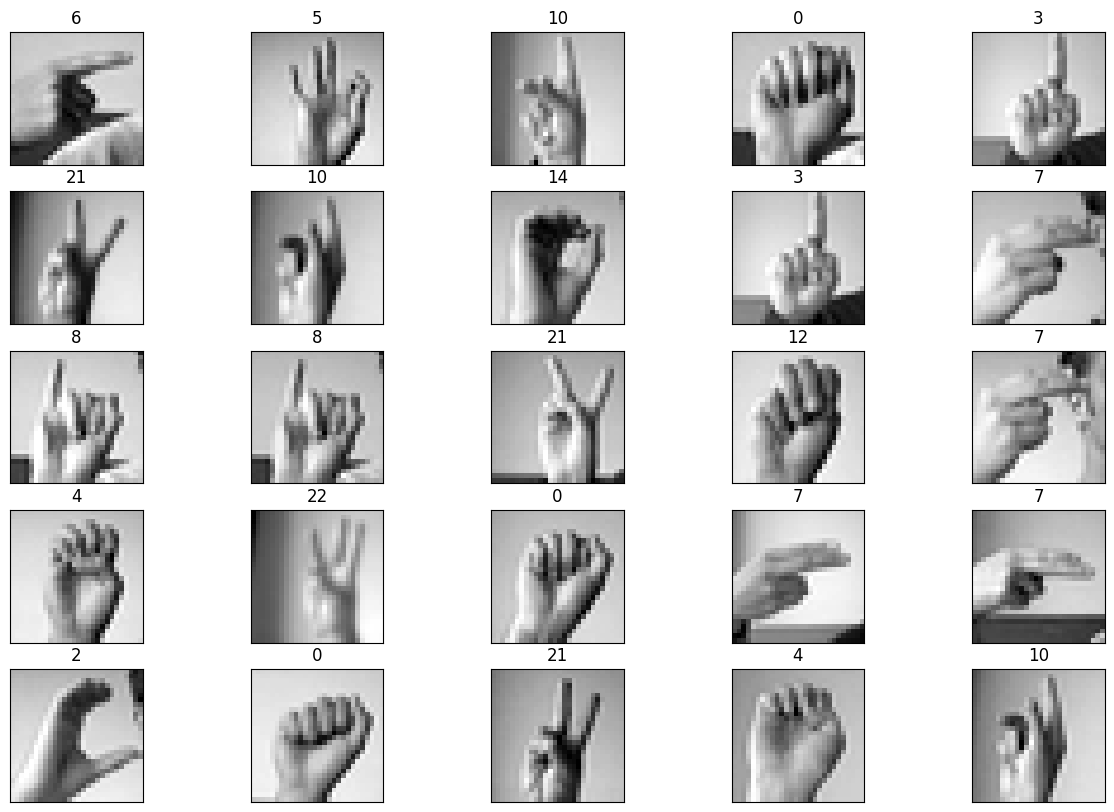

In [26]:
#creating a 5x5 grid of the first 25 photos in the test images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(Y_test[i])
plt.show()

In [27]:
#spliting training images into the images we will use for training the model and validating the model
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.3, random_state=7)

In [28]:
#showing the shapes of our train, validate, and test images
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(19218, 28, 28, 1)
(19218,)
(8237, 28, 28, 1)
(8237,)
(7172, 28, 28, 1)
(7172,)


In [29]:
#creating our CNN model
model = keras.Sequential([

    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same',
                  input_shape=[28, 28, 1]),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(.25),

    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=64, activation="relu"),
    layers.Dense(units=26, activation="softmax"),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [30]:
#compiling the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
#Training the model
history = model.fit(
    x = X_train,
    y = Y_train,
    validation_data= (X_val,Y_val),
    batch_size = 128,
    epochs=50,
    verbose=2,
)

Epoch 1/50
151/151 - 25s - 164ms/step - accuracy: 0.0720 - loss: 3.2657 - val_accuracy: 0.0393 - val_loss: 3.2615
Epoch 2/50
151/151 - 1s - 8ms/step - accuracy: 0.2158 - loss: 2.5800 - val_accuracy: 0.1135 - val_loss: 3.1480
Epoch 3/50
151/151 - 1s - 7ms/step - accuracy: 0.4362 - loss: 1.6714 - val_accuracy: 0.4686 - val_loss: 1.5274
Epoch 4/50
151/151 - 1s - 8ms/step - accuracy: 0.6141 - loss: 1.0972 - val_accuracy: 0.7566 - val_loss: 0.7249
Epoch 5/50
151/151 - 1s - 7ms/step - accuracy: 0.7214 - loss: 0.7896 - val_accuracy: 0.8858 - val_loss: 0.4047
Epoch 6/50
151/151 - 1s - 8ms/step - accuracy: 0.7911 - loss: 0.5884 - val_accuracy: 0.9210 - val_loss: 0.2942
Epoch 7/50
151/151 - 1s - 8ms/step - accuracy: 0.8388 - loss: 0.4551 - val_accuracy: 0.9568 - val_loss: 0.1687
Epoch 8/50
151/151 - 1s - 10ms/step - accuracy: 0.8771 - loss: 0.3597 - val_accuracy: 0.9682 - val_loss: 0.1223
Epoch 9/50
151/151 - 2s - 16ms/step - accuracy: 0.8953 - loss: 0.2982 - val_accuracy: 0.9831 - val_loss: 0.0

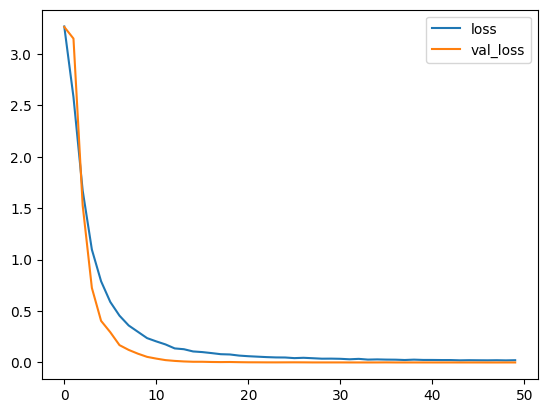

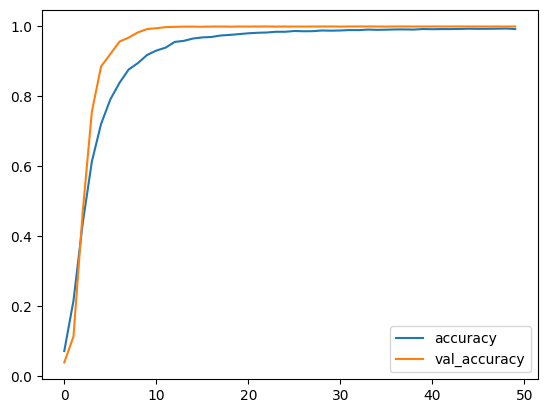

In [32]:
#Viewing the training results
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [33]:
#creating our predictions using the test pixel values
predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis = 1)

#creating a report that show how our predictions compare with actual values
print(classification_report(Y_test, predictions))

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       0.95      0.96      0.95       348
           7       1.00      0.96      0.98       436
           8       1.00      1.00      1.00       288
          10       1.00      1.00      1.00       331
          11       1.00      1.00      1.00       209
          12       0.99      1.00      1.00       394
          13       1.00      0.99      0.99       291
          14       1.00      1.00      1.00       246
          15       1.00      1.00      1.00       347
          16       1.00      1.00      1.00       164
          17       0.99      1.00      1